# <center> <img src="../../labs/img/ITESOLogo.png" alt="ITESO" width="480" height="130"> </center>
# <center> **Departamento de Electrónica, Sistemas e Informática** </center>
---
### <center> **Big Data** </center>
---
### <center> **Spring 2025** </center>
---
**Mid-term exam**

**Date**: 3/12/2025

**Student Name**: Diego Orozco

**Professor**: Pablo Camarillo Ramirez

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("SparkSQL-Exam-1-OrozcoDiego") \
    .master("spark://368ad5a83fd7:7077") \
    .config("spark.ui.port","4040") \
    .getOrCreate()
sc = spark.sparkContext

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/13 00:36:30 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# 1. Read the data

In [28]:
from team_ParDeDos.spark_utils import SparkUtils

sales_schema = SparkUtils.generate_schema([("transaction_id", "integer"), ("product_id", "integer"), ("customer_id", "integer"), ("sale_amount", "double"), ("sale_date", "date")])
products_schema = SparkUtils.generate_schema([("product_id", "integer"), ("product_name", "string"), ("category", "string"), ("price", "double")])

sales_df = spark.read \
           .schema(sales_schema) \
           .option("header", "true") \
           .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/sales.csv")

products_df = spark.read \
              .schema(products_schema) \
              .option("header", "true") \
              .csv("/home/jovyan/notebooks/data/exam_P2025_ESI3914N/products.csv")

# 2. Join Operations

In [29]:
joined_df = sales_df.join(products_df, sales_df["product_id"] == products_df["product_id"], "left")

# 3. Group and Aggregate

In [30]:
total_sales_df = joined_df.groupBy("category").sum("sale_amount")

# 4. Transformations

In [31]:
from pyspark.sql.functions import when

transformed_df = joined_df.withColumn("sale_type", when(joined_df["sale_amount"] > 50, "High").otherwise("Low"))

# 5. Filter

In [32]:
from pyspark.sql.functions import col

transformed_df = transformed_df.filter(col("category") == "Electronics")

# 6. Select

In [33]:
transformed_df = transformed_df.select("product_name", "sale_amount", "sale_type")

# 7. Spark Plan

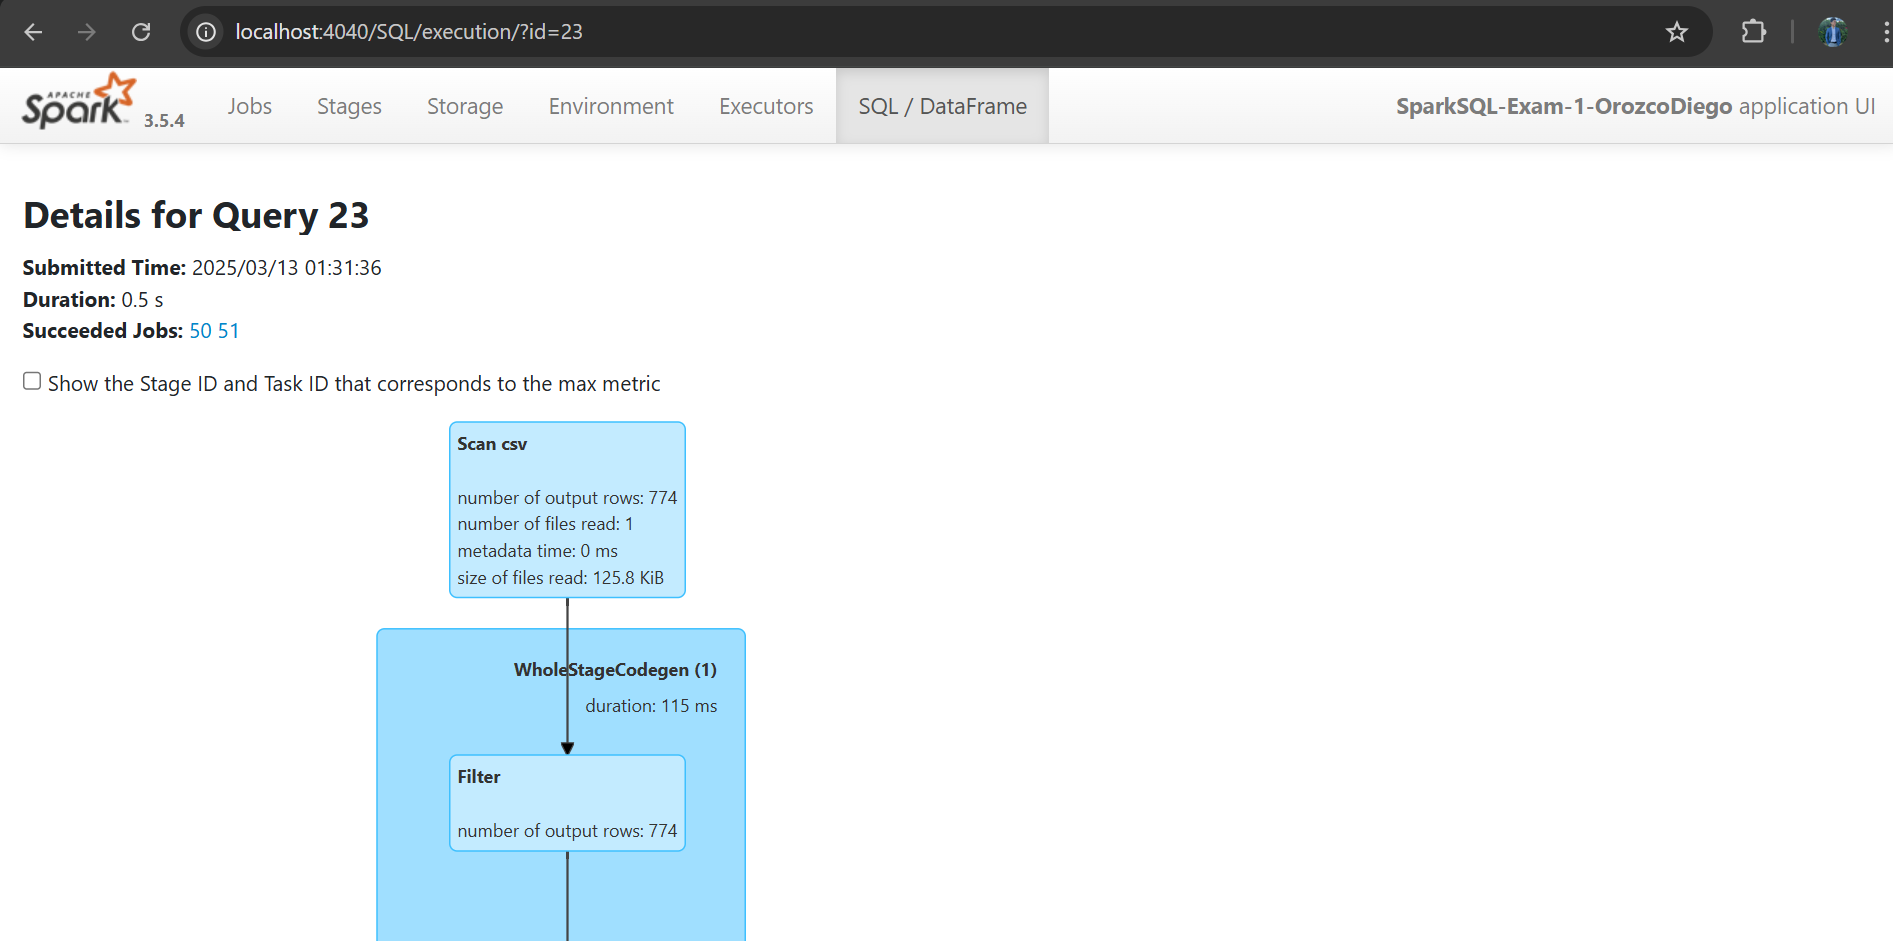

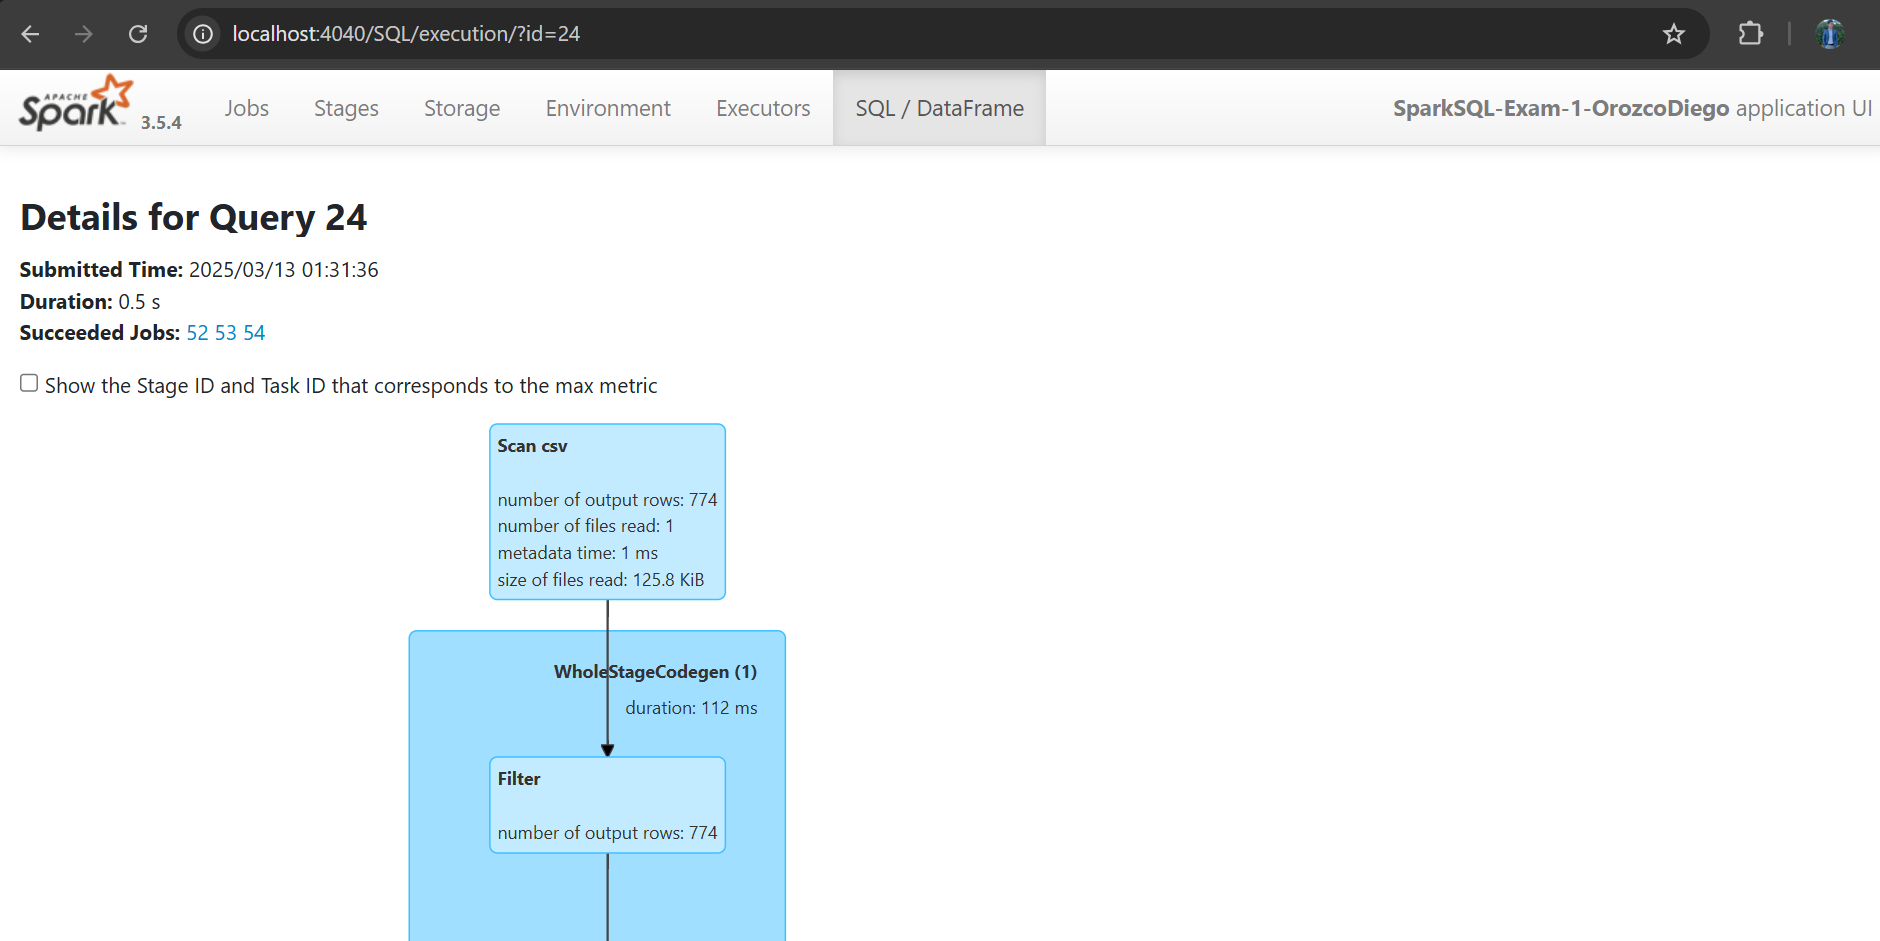

# 8. Actions

In [34]:
transformed_df.show(5, truncate=False)
transformed_df.count()

+------------+-----------+---------+
|product_name|sale_amount|sale_type|
+------------+-----------+---------+
|Product 175 |232.46     |High     |
|Product 177 |460.4      |High     |
|Product 139 |575.25     |High     |
|Product 100 |513.06     |High     |
|Product 115 |60.44      |High     |
+------------+-----------+---------+
only showing top 5 rows



612

In [35]:
sc.stop()